<a href="https://colab.research.google.com/github/PECO-chan/Keras-book-practice/blob/master/copy_chap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
samples  =["The cat sat on the mat.", "The dog ate my homework."]

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index)+1

max_length = 10
results = np.zeros((len(samples), max_length, max(token_index.values()) +1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

In [4]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [6]:
max(token_index.values()) +1

11

In [7]:
token_index.values()

dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [9]:
token_index.items()

dict_items([('The', 1), ('cat', 2), ('sat', 3), ('on', 4), ('the', 5), ('mat.', 6), ('dog', 7), ('ate', 8), ('my', 9), ('homework.', 10)])

In [10]:
for i in samples:
  for j in i.split():
    print(j)

The
cat
sat
on
the
mat.
The
dog
ate
my
homework.


In [11]:
from keras.datasets import imdb
from keras import preprocessing

Using TensorFlow backend.


In [12]:
max_features = 10000
max_len = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = max_len)

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [16]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 222us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 3s 132us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 3s 133us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 3s 132us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 3s 130us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 3s 132us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 3s 133us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - v

In [18]:
#!ls ~ -a

.   .bashrc  .config   .gsutil	 .jupyter  .local     .npm  .profile
..  .cache   .forever  .ipython  .keras    .node-gyp  .nv


In [19]:
#!ls ~/.keras/datasets -al

total 17064
drwxr-xr-x 2 root root     4096 Jan 13 02:40 .
drwxr-xr-x 3 root root     4096 Jan 13 02:40 ..
-rw-r--r-- 1 root root 17464789 Jan 13 02:40 imdb.npz


**IMDBデータの準備**

In [20]:
from google.colab import files
files.upload()

Saving aclImdb_v1.tar.gz to aclImdb_v1.tar.gz


In [0]:
!tar -zxvf aclImdb_v1.tar.gz

In [22]:
!ls

aclImdb  aclImdb_v1.tar.gz  sample_data


In [23]:
!ls aclImdb

imdbEr.txt  imdb.vocab	README	test  train


In [24]:
!ls aclImdb/train

labeledBow.feat  pos	unsupBow.feat  urls_pos.txt
neg		 unsup	urls_neg.txt   urls_unsup.txt


In [0]:
!ls aclImdb/train/pos

In [0]:
import os

In [0]:
imdb_dir = "aclImdb"
train_dir = "aclImdb/train"

labels = []
texts = []

In [0]:
for label_type in ["neg", "pos"]:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == ".txt":
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == "neg":
        labels.append(0)
      else:
        labels.append(1)

In [0]:
a = "abcd"

In [29]:
a[-1]

'd'

In [30]:
len(a)

4

In [31]:
for i in a:
  print(i)

a
b
c
d


In [0]:
#リスト、タプルとかだけでなく、文字列型もシーケンス

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [0]:
max_len = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [0]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [42]:
print(len(texts))
print(len([a for a in texts[0].split()]))
print(len([a for a in texts[10].split()]))

25000
534
210


In [44]:
texts[10]

'The movie is a total crap. We have two good actors who are miscast and a meat-head of an actor Salman Khan just to attract the female audience. The story is a crap. The characters poorly sketched. Non existent story telling. No editing to speak of. Ajay Devgan as a Rock Star..that is a dream in itself. The movie drags along to the point of decadence. The whole charade about Arjun bringing his Manna to London, let him grope his girlfriend and let him not play at Wembley (Vimbley in the dubbing process) is absurd. Salman Khan\'s over the top acting or faking is too painful to watch. I remember seeing some good movies from this Producer Vipul Shah but this is not one of them. It seems all the good directors are falling prey to the Box Office mania..that the Mumbai Media Morons have created. This is yet another crap movie in the lines of "Wanted" with idiot actor like Salman Khan who has no place in a Good Hindi Cinema. He is good to the Indian Cinema as Titanic was to the Winter Cruise B

In [45]:
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

Found 88582 unique tokens.


In [47]:
max(word_index.values())

88582

In [49]:
c = 0
for i in word_index.items():
  print(i)
  c += 1
  if c == 5:
    break

('the', 1)
('and', 2)
('a', 3)
('of', 4)
('to', 5)


In [0]:
rev = dict([[j, i] for i, j in word_index.items()])

In [64]:
for i in range(len(word_index)-5+1, len(word_index)+1)[::-1]:
  print((i, rev[i]))


(88582, 'dissectionist')
(88581, 'internalist')
(88580, 'bensen')
(88579, 'poolboys')
(88578, "bally's")


In [57]:
print(len(sequences))
print(len(sequences[0]))
print(len(sequences[10]))

25000
482
198


In [68]:
sequences[10][:10]

[1, 17, 6, 3, 960, 592, 72, 25, 104, 49]

In [69]:
for i in sequences[10][:10]:
  print(rev[i])

the
movie
is
a
total
crap
we
have
two
good


In [70]:
texts[0]

'Superficically, "Brigadoon" is a very promising entertainment package. Gene Kelly and Vincente Minnelli, the team behind "An American in Paris", are reunited with a lot of the great craftsmen and women behind their previous collaborations. Gene\'s leading lady is Cyd Charisse, one of the best dancers of 40s/50s cinema, and unlike the generally superior "It\'s Always Fair Weather" this film gave them the chance for not only one but two dances. Lerner and Loewe were the rising team behind such future hits as "My Fair Lady" and Minnelli\'s musical masterpiece "Gigi"; Lerner and Minnelli had already demonstrated their sanguine collaborative juices on the excellent "American in Paris."<br /><br />What happened along the way? Why is the movie itself such a stupid bore? Minnelli himself didn\'t want to do the movie, despite his previous warm artistic and personal relationship with Lerner. Maybe it was because the movie\'s innate conservatism was just a bit too much of two steps forward for M

In [71]:
sequences[0][:10]

[6, 3, 52, 2425, 718, 4988, 1918, 1476, 2, 7093]

In [72]:
for i in sequences[0][:10]:
  print(rev[i])

is
a
very
promising
entertainment
package
gene
kelly
and
minnelli


In [76]:
tmp_max = []
tmp_min = []
for seq in sequences:
  tmp_max.append(max(seq))
  tmp_min.append(min(seq))
print(max(tmp_max))
print(min(tmp_min))

9999
1


In [77]:
rev[6]

'is'

In [78]:
rev[1]

'the'

In [79]:
rev[0]#0は定義されていないKeyError

KeyError: ignored

In [83]:
for i in range(1, 30):
  print(rev[i])

the
and
a
of
to
is
br
in
it
i
this
that
was
as
for
with
movie
but
film
on
not
you
are
his
have
he
be
one
all


続きやってく

In [0]:
data = pad_sequences(sequences, maxlen=max_len)

In [85]:
data[0][:10]

array([860, 407,   6, 642,   2, 217,  18,  97, 154,  44], dtype=int32)

In [87]:
data[10][:10]

array([ 103,   10,  374,  316,   46,   49,   99,   36,   11, 1322],
      dtype=int32)

In [0]:
data2 = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

In [90]:
data2[0][:10]

array([   6,    3,   52, 2425,  718, 4988, 1918, 1476,    2, 7093],
      dtype=int32)

In [91]:
data2[10][:10]

array([  1,  17,   6,   3, 960, 592,  72,  25, 104,  49], dtype=int32)

In [0]:
labels = np.asarray(labels)

In [94]:
data.shape

(25000, 100)

In [95]:
labels.shape

(25000,)

In [0]:
indices = np.arange(data.shape[0])

In [98]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [0]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

GloVeの準備

In [0]:
from google.colab import files
files.upload()

**GloVeが重すぎるので、この部分はもうやめる**

**RNNとかやってく**

numpy実装

In [0]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t
  
final_output_sequence = np.stack(successive_outputs, axis=0)

In [110]:
tmp = [[1,2,3], [4,5,6]]
tmp

[[1, 2, 3], [4, 5, 6]]

In [111]:
np.stack(tmp, axis=0)

array([[1, 2, 3],
       [4, 5, 6]])

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [0]:
max_features = 10000
max_len = 500
batch_size = 32

In [0]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [0]:
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [0]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

In [158]:
history = model.fit(input_train, y_train,
                    epochs=10, batch_size=batch_size, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 152s 8ms/step - loss: 0.6070 - acc: 0.6439 - val_loss: 0.4370 - val_acc: 0.8048
Epoch 2/10
20000/20000 [==============================] - 151s 8ms/step - loss: 0.3719 - acc: 0.8421 - val_loss: 0.3814 - val_acc: 0.8352
Epoch 3/10
20000/20000 [==============================] - 151s 8ms/step - loss: 0.3132 - acc: 0.8739 - val_loss: 0.3881 - val_acc: 0.8198
Epoch 4/10
20000/20000 [==============================] - 151s 8ms/step - loss: 0.2653 - acc: 0.8939 - val_loss: 0.3678 - val_acc: 0.8410
Epoch 5/10
20000/20000 [==============================] - 151s 8ms/step - loss: 0.2308 - acc: 0.9107 - val_loss: 0.4119 - val_acc: 0.8326
Epoch 6/10
20000/20000 [==============================] - 151s 8ms/step - loss: 0.1951 - acc: 0.9277 - val_loss: 0.4094 - val_acc: 0.8422
Epoch 7/10
20000/20000 [==============================] - 151s 8ms/step - loss: 0.1559 - acc: 0.9432 - val_loss: 0.4099 - v

In [1]:
from keras.layers import LSTM

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

In [164]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 150s 7ms/step - loss: 0.5636 - acc: 0.7357 - val_loss: 0.4779 - val_acc: 0.7766
Epoch 2/10
20000/20000 [==============================] - 148s 7ms/step - loss: 0.3117 - acc: 0.8749 - val_loss: 0.3685 - val_acc: 0.8510
Epoch 3/10
20000/20000 [==============================] - 149s 7ms/step - loss: 0.2432 - acc: 0.9056 - val_loss: 0.2925 - val_acc: 0.8764
Epoch 4/10
20000/20000 [==============================] - 149s 7ms/step - loss: 0.2061 - acc: 0.9234 - val_loss: 0.3741 - val_acc: 0.8400
Epoch 5/10
20000/20000 [==============================] - 149s 7ms/step - loss: 0.1782 - acc: 0.9345 - val_loss: 0.3108 - val_acc: 0.8676
Epoch 6/10
20000/20000 [==============================] - 148s 7ms/step - loss: 0.1591 - acc: 0.9420 - val_loss: 0.3288 - val_acc: 0.8730
Epoch 7/10
20000/20000 [==============================] - 149s 7ms/step - loss: 0.1445 - acc: 0.9488 - val_loss: 0.3204 - v

advanced recurrent

In [0]:
!mkdir jena_climate

In [0]:
#!cd jena_climate

In [2]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

--2019-01-14 02:09:39--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.229
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  14.4MB/s    in 0.9s    

2019-01-14 02:09:40 (14.4 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



In [3]:
!unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [0]:
!cp jena_climate_2009_2016.csv.zip jena_climate/jena_climate_2009_2016.csv.zip
!cp jena_climate_2009_2016.csv jena_climate/jena_climate_2009_2016.csv

In [0]:
import os

data_dir = "jena_climate"
fname = os.path.join(data_dir, "jena_climate_2009_2016.csv")

f = open(fname)
data = f.read()
f.close()

In [20]:
type(data)

str

In [21]:
len(data)

43164220

In [0]:
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

In [24]:
print(header)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']


In [25]:
len(lines)

420551

In [26]:
len(lines[0])

101

In [27]:
len(lines[10])

101

In [0]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i, :] = values

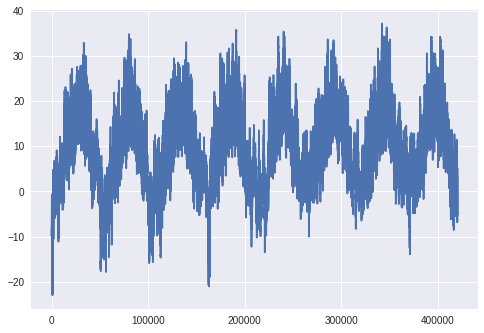

In [8]:
from matplotlib import pyplot as plt

temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)
plt.show()

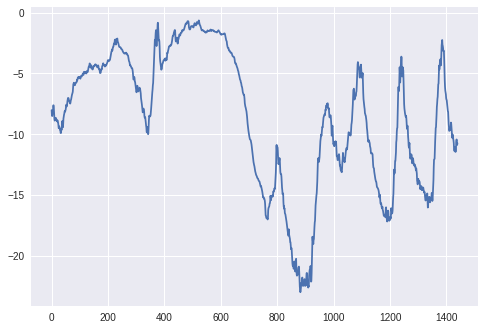

In [32]:
plt.plot(range(1440), temp[:1440])
plt.show()

In [0]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [0]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    
    samples = np.zeros((len(rows),
                       lookback // step,
                       data.shape[-1]))
    
    targets = np.zeros((len(rows), ))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    
    yield samples, targets

In [0]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 0,
                      max_index = 200000,
                      shuffle=True,
                      step = step,
                      batch_size = batch_size)

val_gen = generator(float_data,
                    lookback = lookback,
                    delay = delay,
                    min_index = 200001,
                    max_index = 300000,
                    step = step,
                    batch_size = batch_size)
  
test_gen = generator(float_data,
                     lookback = lookback,
                     delay = delay,
                     min_index = 300001,
                     max_index = None,
                     step = step,
                     batch_size = batch_size)

In [0]:
val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data) - 300001 - lookback) // batch_size

常識的なベースライン

In [0]:
def evaluate_naive_method():
  batch_maes = []
  for step in range(val_steps):
    samples, targets = next(val_gen)
    preds = samples[:, -1, 1]
    mae = np.mean(np.abs(preds - targets))
    batch_maes.append(mae)
  print(np.mean(batch_maes))

In [16]:
evaluate_naive_method()

0.2897359729905486


In [18]:
celsius_mae = 0.29 * std[1]
celsius_mae

2.5672247338393395

Recurrent baseline

In [21]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data = val_gen,
                              validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 15s 30ms/step - loss: 1.4144 - val_loss: 0.7872
Epoch 2/20
500/500 [==============================] - 13s 26ms/step - loss: 0.4653 - val_loss: 0.3074
Epoch 3/20
500/500 [==============================] - 13s 27ms/step - loss: 0.3008 - val_loss: 0.3029
Epoch 4/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2737 - val_loss: 0.3036
Epoch 5/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2599 - val_loss: 0.3162
Epoch 6/20
500/500 [==============================] - 14s 27ms/step - loss: 0.2512 - val_loss: 0.3103
Epoch 7/20
500/500 [==============================] - 14s 27ms/step - loss: 0.2443 - val_loss: 0.3273
Epoch 8/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2382 - val_loss: 0.3094
Epoch 9/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2327 - val_loss: 0.3135
Epoch 10/20
500/500 [==============================] - 13s 27ms/step - loss: 0.225

In [22]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data = val_gen,
                              validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 330s 659ms/step - loss: 0.3107 - val_loss: 0.2724
Epoch 2/20
271/500 [===============>..............] - ETA: 1:32 - loss: 0.2859

KeyboardInterrupt: ignored

実行時間長いから回さないでいく

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout = 0.2,
                     recurrent_dropout = 0.2,
                     input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data = val_gen,
                              validation_steps = val_steps)

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout = 0.1,
                     recurrent_dropout = 0.5,
                     return_sequences = True,
                     input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.GRU(64,
                     activation="relu",
                     dropout = 0.1,
                     recurrent_dropout = 0.5,))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data = val_gen,
                              validation_steps = val_steps)

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32,
                                          input_shape=(lookback // step, float_data.shape[-1]))))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data = val_gen,
                              validation_steps = val_steps)

1DConv CNN